# Experiment3 中心性分析(Network Centrality Analysis)

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import jupyterthemes.jtplot as jtplot
jtplot.style()
jtplot.style(theme='onedork') # 选择一个绘图主题 
np.set_printoptions(suppress=True) #取消科学计数法

## 加载数据集

+ Zachary空手道俱乐部

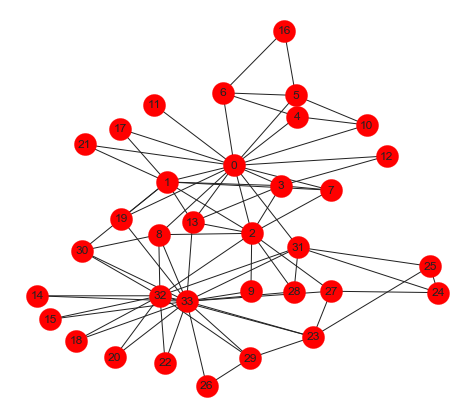

In [2]:
#获得Karate数据 
G = nx.karate_club_graph()
# 设置布局算法
pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color ='red')

+ circular_layout:将节点位置调整为圆形；
+ random_layout:将节点随机的放在一个单位正方形内；
+ shell_layout:将节点放于多个同心圆内；
+ spring_layout:使用FR算法来定位节点；
+ mspectral_layout:利用图拉普拉斯的特征向量定位节点

## 中心性的度量

### 度分布

In [3]:
deg=G.degree
sorted(dict(deg).items(), key=lambda kv: (-kv[1], kv[0]))[:10] ## display a histogram of node degrees                                                             ## in 100 bins

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5)]

In [4]:
deg=nx.degree(G)
deg

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

Text(0.5, 1.0, 'Degree histogram')

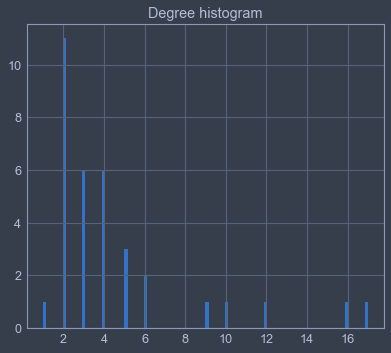

In [5]:
h = plt.hist(dict(deg).values(), bins=100)
plt.title('Degree histogram')

Text(0.5, 1.0, 'Degree histogram (LogLog Plot)')

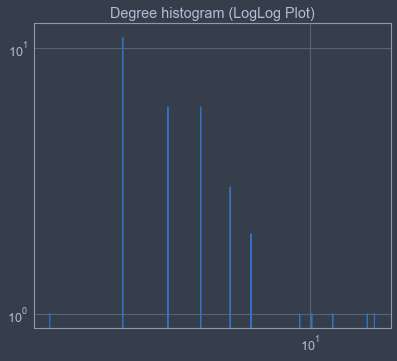

In [6]:
plt.loglog(h[1][1:], h[0]) ## 在对数-对数空间绘制相同的柱状图
plt.title('Degree histogram (LogLog Plot)')

### 基于中心性测度

#### 点度中心性(degree centrality)

+ 点度中心性(degree centrality),度定义为节点的邻居节点的数量.度中心性反映的是在整个网络中当前节点的直接影响力.例如,微博中拥有大量粉丝的用户可能有更大的影响力,然而只考虑度不考虑节点在网络中的位置显然是不可取的

In [7]:
degree_centrality = nx.degree_centrality(G)
sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:10]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152)]

#### 介数中心性(betweenness centrality)
+ 网络中两个节点之间的最短路径经过当前节点的次数,介数中心性描述的是信息在社会网络中传播时经过该节点的频率.该指标值越大,表示在网络拓扑中该节点越繁忙.若移除介数大的节点,则会造成网络拥堵,不利于信息传播.

In [8]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:10]

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

#### 紧密中心性(closeness centrality)
+ 衡量节点达到其他节点的速度,该指标值越大,表示当前节点到达另一节点的路径越多且路径长度较短.该指标可以衡量节点对其他节点的间接影响力.

In [9]:
closeness_centrality = nx.closeness_centrality(G)
sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)[:10]

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625),
 (13, 0.515625),
 (32, 0.515625),
 (19, 0.5),
 (1, 0.4852941176470588),
 (3, 0.4647887323943662)]

#### 特征向量中心性(eigenvector centrality)
+ 度量节点全局影响力的一个重要指标,特征向量中心性不仅考虑邻居节点的数量,还考虑邻居节点的重要性,将单个节点的影响力看成其他节点影响力的线性组合.
+ 秘密或非官方运作的有权势的顾问或决策者（灰衣主教）

In [10]:
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted(eigenvector_centrality.items(), key=lambda x:x[1], reverse=True)[:10]

[(33, 0.373371213013235),
 (0, 0.3554834941851943),
 (2, 0.31718938996844476),
 (32, 0.3086510477336959),
 (1, 0.2659538704545025),
 (8, 0.2274050914716605),
 (13, 0.22646969838808148),
 (3, 0.2111740783205706),
 (31, 0.19103626979791702),
 (30, 0.17476027834493085)]

### 基于社团结构的度量

#### 聚类系数(local clustering coefficient)

+ 局部聚类系数(local clustering coefficient)用于衡量节点的邻居节点之间联系的紧密程度.局部聚类系数(以下简称为聚类系数)等于节点vi的邻居节点之间连边的数量与邻居节点之间可以连边的最大数量之比.

In [11]:
clustering = nx.clustering(G)
sorted(clustering.items(), key=lambda x:x[1], reverse=True)[:10]

[(7, 1.0),
 (12, 1.0),
 (14, 1.0),
 (15, 1.0),
 (16, 1.0),
 (17, 1.0),
 (18, 1.0),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0)]

#### 结构洞(structural holes)
+ 经典的社会学理论.由于结构洞的存在,一些充当中间人的节点可以获得相比于其邻居节点更高的网络收益

|函数|含义|
|:---|:---|
|constraint(G[, nodes, weight])|Returns the constraint on all nodes in the graph G.|
|effective_size(G[, nodes, weight])|Returns the effective size of all nodes in the graph G.|
|local_constraint(G, u, v[, weight])|Returns the local constraint on the node u with respect to the node v in the graph G.|

+ constraint

In [12]:
constraint = nx.constraint(G)
sorted(constraint.items(), key=lambda x: x[1], reverse=True)[:10]

[(11, 1.0),
 (16, 0.78125),
 (26, 0.6709018166089966),
 (12, 0.6225043402777779),
 (17, 0.590868537808642),
 (21, 0.590868537808642),
 (14, 0.5736795943867743),
 (15, 0.5736795943867743),
 (18, 0.5736795943867743),
 (20, 0.5736795943867743)]

+ effective size

In [13]:
effective_size = nx.effective_size(G)
sorted(effective_size.items(), key=lambda x: x[1], reverse=True)[:10]

[(33, 15.235294117647058),
 (0, 13.75),
 (32, 9.833333333333334),
 (2, 7.8),
 (1, 6.333333333333334),
 (31, 5.0),
 (27, 3.5),
 (23, 3.4),
 (8, 3.0),
 (3, 2.6666666666666665)]

### 基于随机游走的度量

#### PageRank算法

$PR(N)=Sum_{i \in nodes} (PR(i)/out\_degree(i))$

In [14]:
pagerank = nx.pagerank(G, alpha=0.85)
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

[(33, 0.1009179167487121),
 (0, 0.09700181758983709),
 (32, 0.07169213006588289),
 (2, 0.057078423047636745),
 (1, 0.05287839103742701),
 (31, 0.03715663592267942),
 (3, 0.03586064322306479),
 (23, 0.03152091531163228),
 (8, 0.029765339186167028),
 (13, 0.029536314977202986)]

#### HITS算法

In [15]:
h,a = nx.hits(G)

+ 导航度h

In [16]:
h

{0: 0.07141272875773573,
 1: 0.053427231205172614,
 2: 0.06371906453963268,
 3: 0.04242273710428976,
 4: 0.01526095969815266,
 5: 0.015966913494418547,
 6: 0.015966913494418547,
 7: 0.034343167206797434,
 8: 0.0456819251308063,
 9: 0.020625667757182626,
 10: 0.01526095969815266,
 11: 0.01061789150852051,
 12: 0.01692545078543599,
 13: 0.04549486406600547,
 14: 0.020370345842716076,
 15: 0.020370345842716076,
 16: 0.004748031841562519,
 17: 0.018561637031907358,
 18: 0.020370345842716076,
 19: 0.02971333389111539,
 20: 0.020370345842716076,
 21: 0.018561637031907358,
 22: 0.020370345842716076,
 23: 0.030156497528902444,
 24: 0.011460952230139869,
 25: 0.01189366439609368,
 26: 0.015182734341447207,
 27: 0.02681349412708363,
 28: 0.0263315057833753,
 29: 0.027111539646424865,
 30: 0.03510623798827733,
 31: 0.03837574188047834,
 32: 0.06200184647463986,
 33: 0.07500294214634279}

+ 权威度a

In [17]:
a

{0: 0.07141272880870855,
 1: 0.05342723122870397,
 2: 0.06371906455587135,
 3: 0.04242273710611524,
 4: 0.015260959692251741,
 5: 0.01596691348769785,
 6: 0.01596691348769785,
 7: 0.03434316719678568,
 8: 0.045681925113766106,
 9: 0.020625667747004237,
 10: 0.015260959692251741,
 11: 0.010617891499780771,
 12: 0.016925450777611116,
 13: 0.045494864044925934,
 14: 0.02037034582705704,
 15: 0.02037034582705704,
 16: 0.004748031844529441,
 17: 0.01856163702009135,
 18: 0.02037034582705704,
 19: 0.029713333868231606,
 20: 0.02037034582705704,
 21: 0.01856163702009135,
 22: 0.02037034582705704,
 23: 0.030156497522138854,
 24: 0.011460952243147787,
 25: 0.011893664411194165,
 26: 0.015182734336172116,
 27: 0.026813494122100573,
 28: 0.026331505783102067,
 29: 0.02711153964098065,
 30: 0.03510623797808329,
 31: 0.03837574185646307,
 32: 0.06200184653550559,
 33: 0.0750029422437107}

## 关系的度量

### 嵌入性（Embeddedness）

In [18]:
list(nx.common_neighbors(G, 1, 2))

[0, 3, 7, 13]

### 桥（Bridges）

In [19]:
nx.has_bridges(G)

True

In [20]:
list(nx.bridges(G))

[(0, 11)]

### 捷径（Local Bridges）

In [21]:
list(nx.local_bridges(G))

[(0, 11, inf),
 (0, 31, 3),
 (1, 30, 3),
 (2, 9, 3),
 (2, 27, 3),
 (2, 28, 3),
 (9, 33, 3),
 (13, 33, 3),
 (19, 33, 3),
 (23, 25, 3),
 (24, 27, 3)]

## 网络内聚力

### 平均度(Average Degree)

In [22]:
G.number_of_edges() * 2.0 / G.number_of_nodes()

4.588235294117647

### 密度（Density）

In [23]:
nx.density(G)

0.13903743315508021

### 直径（Diameter）

In [24]:
nx.diameter(G)

5

### 平均最短路径长度（Average shortest path length）

|函数|含义|
|:---|:---|
|shortest_path(G[, source, target, weight, …])|Compute shortest paths in the graph.|
|all_shortest_paths(G, source, target[, …])|Compute all shortest paths in the graph.|
|shortest_path_length(G[, source, target, …])|Compute shortest path lengths in the graph.|
|<font color=#ff0000>average_shortest_path_length(G[, weight, method])</font>|Returns the average shortest path length.|
|has_path(G, source, target)|Returns True if G has a path from source to target.|

In [25]:
# 平均最短路径长度
nx.average_shortest_path_length(G)

2.408199643493761

### 平均聚类系数

In [26]:
# 计算网络的平均聚类系数，可用于衡量网络的凝聚力
nx.average_clustering(G)

0.5706384782076823

### 网络连通性（Network Connectivity）

In [27]:
len(list(nx.connected_components(G)))

1

In [28]:
nx.number_connected_components(G)

1

In [29]:
for i in nx.connected_components(G):
    print(len(i))

34
